In [2]:
system("python --version")

['zsh:1: command not found: python --version']

In [ ]:
import pandas as pd
import numpy as np
import psycopg2 as pg
import matplotlib.pyplot as plt
%matplotlib inline

from gensim import models
from gensim.models import Word2Vec, KeyedVectors
from gensim.models import Phrases
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)
/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [ ]:
def load_data():
  conn = pg.connect(
    database="db_dsa", 
    user="udsa", 
    password="P@ssword2021", 
    host="92.242.58.173", 
    port="1984"
  ) 
  cur = conn.cursor()
  cur.execute("SELECT NAME from PROJECTS")
  rows = cur.fetchall()
  return pd.DataFrame(rows, columns=['NAME'])

In [ ]:
df = load_data()

In [ ]:
df.loc[30, 'NAME']

'Бинарная переключаемая цепь оптических линий задержки, управляющая фазированной решеткой для мобильной связи 5G'

In [ ]:
feature_size = 300    # Word vector dimensionality  
window_context = 5          # Context window size                                                                                    
min_word_count = 1   # Minimum word count                        
sample = 1e-3   # Downsample setting for frequent words
corpus = list(map(lambda x: list(x), df[['NAME']].values))

In [ ]:
corpus[0]

['Численное и аналитическое исследование эффекта Саффмана-Тейлора']

In [ ]:
model = Word2Vec(corpus, vector_size=feature_size, 
                          window=window_context, min_count=min_word_count, epochs=200, sg=1)

In [ ]:
model.wv[['Численное и аналитическое исследование эффекта Саффмана-Тейлора', 'Численное и аналитическое исследование эффекта Саффмана-Тейлора']].shape

(2, 300)

In [ ]:
model.wv.most_similar('Численное и аналитическое исследование эффекта Саффмана-Тейлора', topn=5)

[('SIP-коммуникатор', 0.144867941737175),
 ('Разработка цифровой системы обучения литературному мастерству',
  0.1441175639629364),
 ('Моделирование пространственно-распределенных эволюционных игр',
  0.12431621551513672),
 ('Исследование влияния параметров геометрии рабочих инструментов на формирование остаточных напряжений в проволоках круглых сечений',
  0.12132144719362259),
 ('Разработка модуля адаптивной аутентификации для веб-ориентированной платформы',
  0.11690745502710342)]

In [ ]:
def scatterplot(model, target, decompose_fn, *args, **kwargs):
  similar_words = model.wv.most_similar(target, topn=10)
  data = model.wv[np.array(similar_words + [(target, 0)])[:, 0]]
  labels = np.array(similar_words + [(target, 0)])[:, 0]
  decompose = decompose_fn(*args, **kwargs).fit_transform(data)
  plt.figure(figsize=(18, 12))
  plt.scatter(decompose[:, 0], decompose[:, 1], c='orange', edgecolors='r')
  plt.scatter(decompose[:, 0], decompose[:, 1], c='orange', edgecolors='r')
  for label, x, y in zip(labels, decompose[:, 0], decompose[:, 1]):
    print(x, y)
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')

9.335074 130.14978
59.511528 117.43909
50.409832 -29.238598
-114.927795 -197.54079
-160.55566 -181.85855
210.34909 -186.7431
147.89616 118.840454
82.36738 229.29785
116.137054 -94.64612
-29.70428 -23.39725
64.74384 55.852535


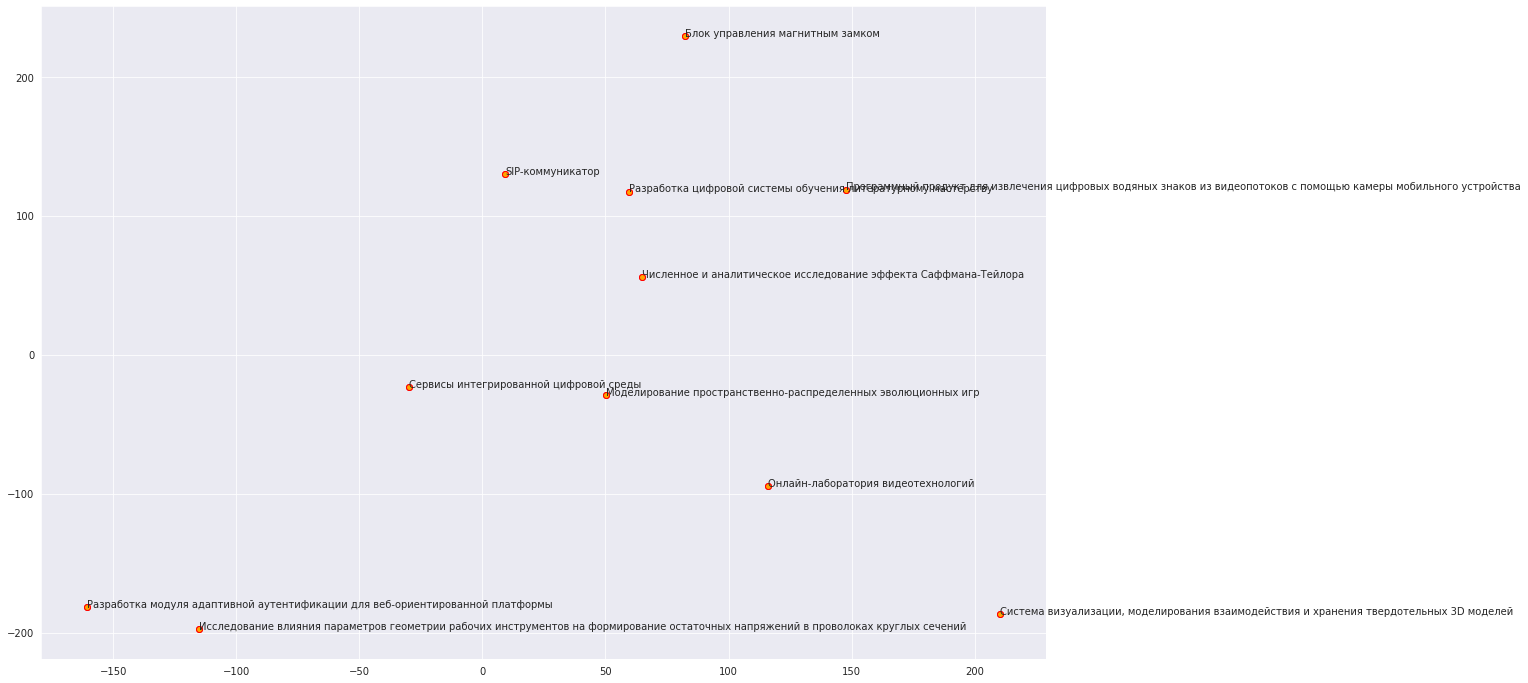

In [ ]:
scatterplot(model, 'Численное и аналитическое исследование эффекта Саффмана-Тейлора', decompose_fn=TSNE, n_components=2, random_state=0, n_iter=10000, perplexity=2)

-0.002003138 -0.014933301
0.006703893 -0.013251778
-0.0068063103 0.010174797
-0.0009170141 0.016373374
0.0048233103 0.018861061
-0.01863622 -0.006197981
0.011732874 -0.010569453
0.022468636 0.0010491689
-0.0050463225 0.0032205363
-0.015011988 -0.0037350547
0.0026922638 -0.0009913552


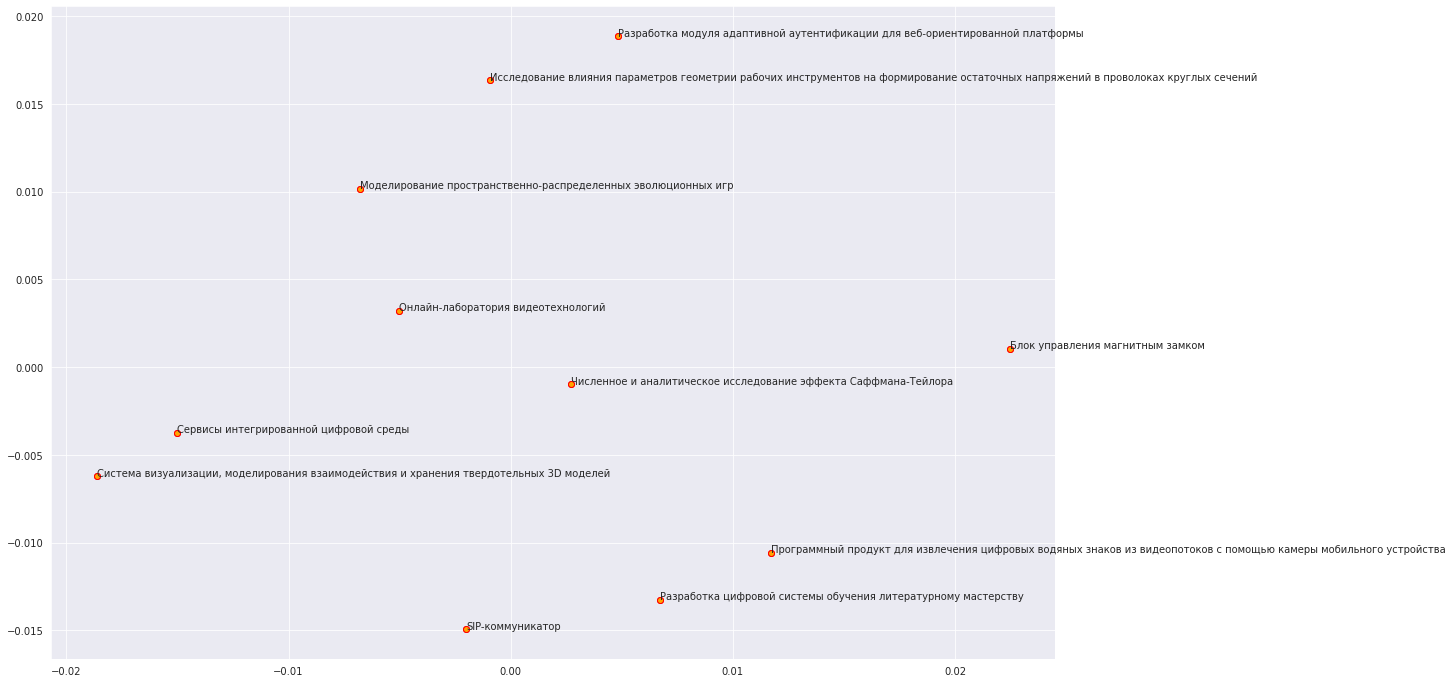

In [ ]:
scatterplot(model, 'Численное и аналитическое исследование эффекта Саффмана-Тейлора', decompose_fn=PCA, n_components=2, random_state=0)

/usr/local/lib/python3.7/dist-packages/umap/umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


16.450352 11.375549
16.667894 10.475816
18.630129 11.166274
18.88111 10.395611
18.375053 9.763249
17.362984 12.028333
16.998827 9.729049
17.790947 10.521911
18.04911 11.715534
17.252981 11.149462
17.697329 9.951169


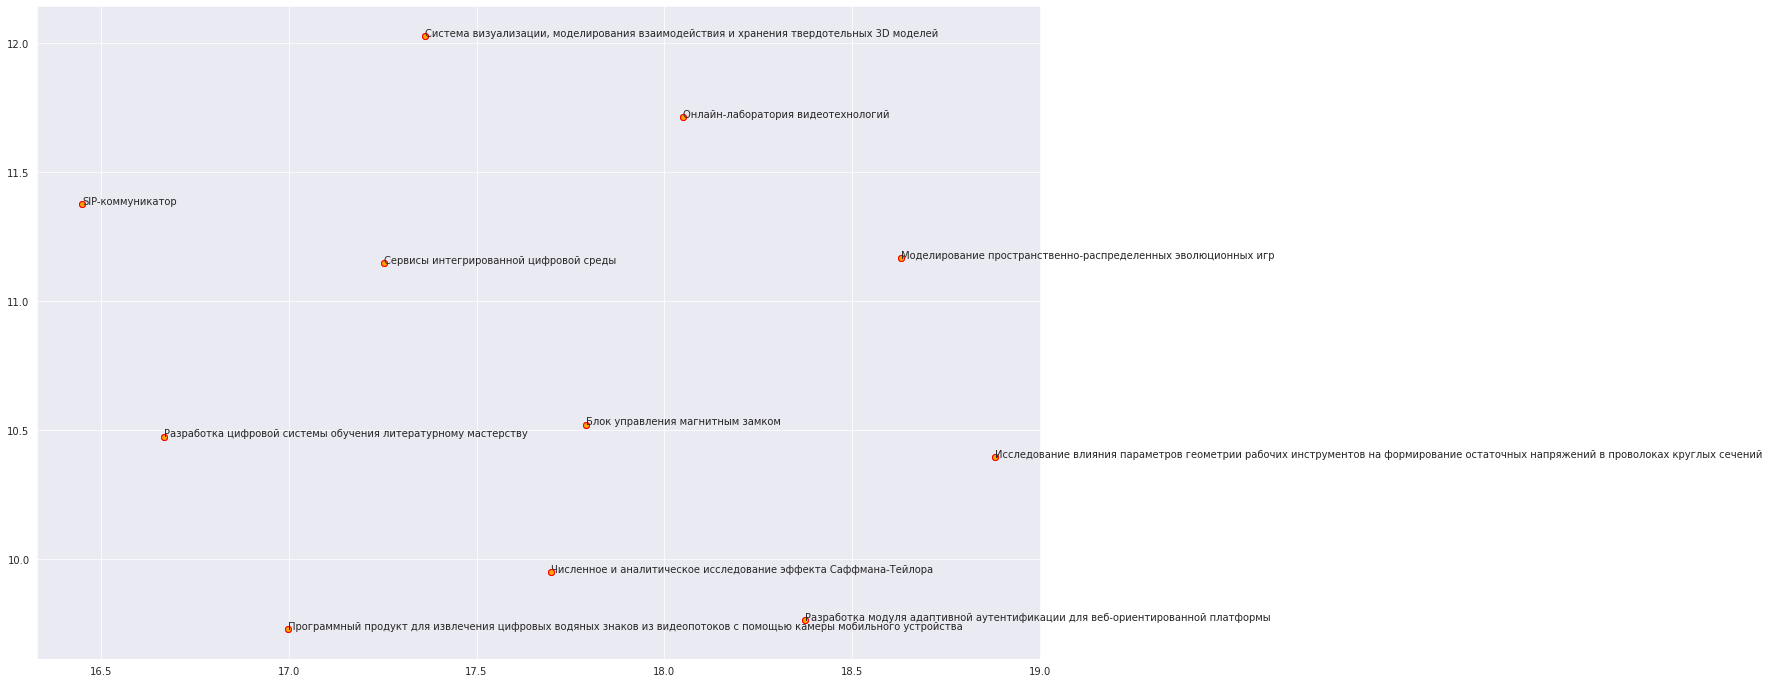

In [ ]:
scatterplot(model, 'Численное и аналитическое исследование эффекта Саффмана-Тейлора', decompose_fn=umap.UMAP, n_components=2, random_state=0)